In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierra_leone = pd.read_csv("../data/sierraleone_clean.csv")

benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra_leone['Country'] = 'Sierra Leone'

df_all = pd.concat([benin, togo, sierra_leone], ignore_index=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_12936\2572438242.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', palette=custom_palette, data=df_all)


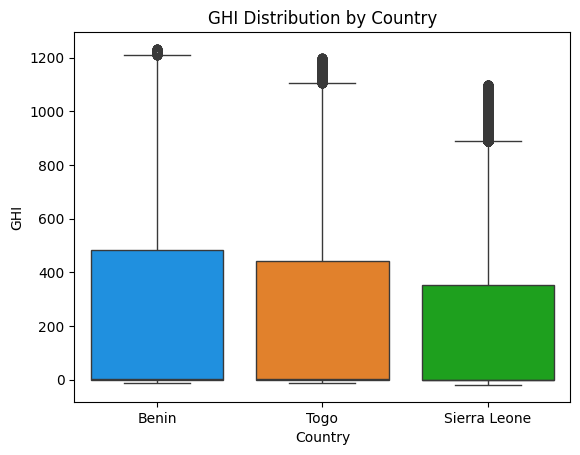

C:\Users\PC\AppData\Local\Temp\ipykernel_12936\2572438242.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', palette=custom_palette, data=df_all)


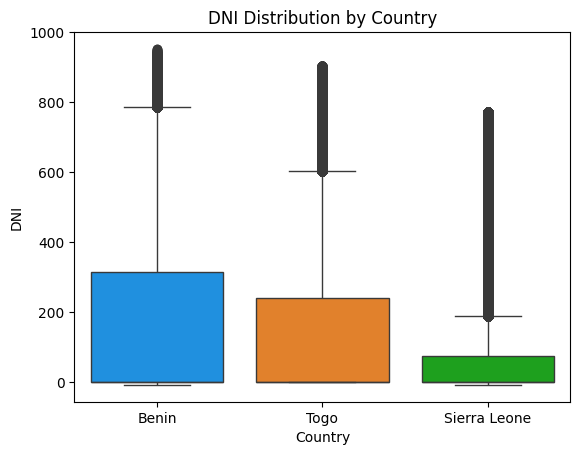

C:\Users\PC\AppData\Local\Temp\ipykernel_12936\2572438242.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DHI', palette=custom_palette, data=df_all)


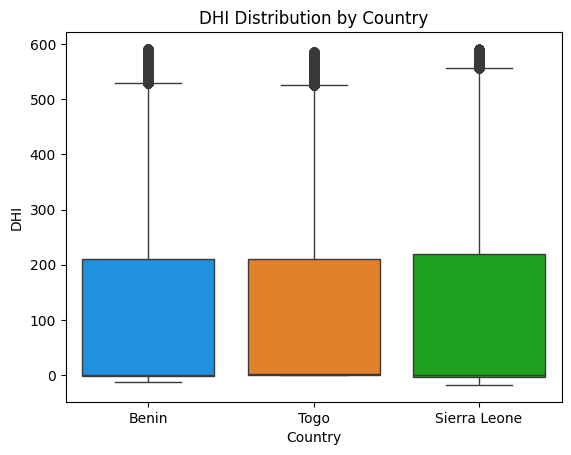

In [8]:
custom_palette = {
    "Benin": "#0095ff",         # blue
    "Togo": "#ff7f0e",          # orange
    "Sierra Leone": "#09b509"   # green
}

# Boxplot for GHI
sns.boxplot(x='Country', y='GHI', palette=custom_palette, data=df_all)
plt.title('GHI Distribution by Country')
plt.show()

# Boxplot for DNI
sns.boxplot(x='Country', y='DNI', palette=custom_palette, data=df_all)
plt.title('DNI Distribution by Country')
plt.show()

# Boxplot for DHI
sns.boxplot(x='Country', y='DHI', palette=custom_palette, data=df_all)
plt.title('DHI Distribution by Country')
plt.show()


In [7]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.87  167.19   -0.1  261.71  110.90    0.5   
Sierra Leone  196.44    0.0  291.24  104.53   -0.1  201.70  110.11   -0.4   
Togo          229.83    2.0  321.64  149.37    0.0  248.55  112.40    1.8   

                      
                 std  
Country               
Benin         152.92  
Sierra Leone  154.17  
Togo          151.30